In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/kidney_disease.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.shape

(400, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(['id'],axis=1,inplace=True)

In [ ]:
df['classification'].value_counts()
df['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [ ]:
df['classification'] = df['classification'].replace(['ckd\t'], 'ckd')
df['dm'] = df['dm'].replace(['\tyes',' yes'], 'yes')
df['dm'] = df['dm'].replace(['\tno'], 'no')

In [ ]:
df['dm'].value_counts()

no     261
yes    137
Name: dm, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['rbc', 'pc','pcc', 'ba', 'pcv', 'wc','rc',	'htn'	,'dm'	,'cad','appet','pe',	'ane'	,'classification']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

df.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,32,72,34,1,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,26,56,49,0,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,19,70,49,0,1,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,20,62,19,1,0,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,23,68,27,0,0,1,0,0,0,0


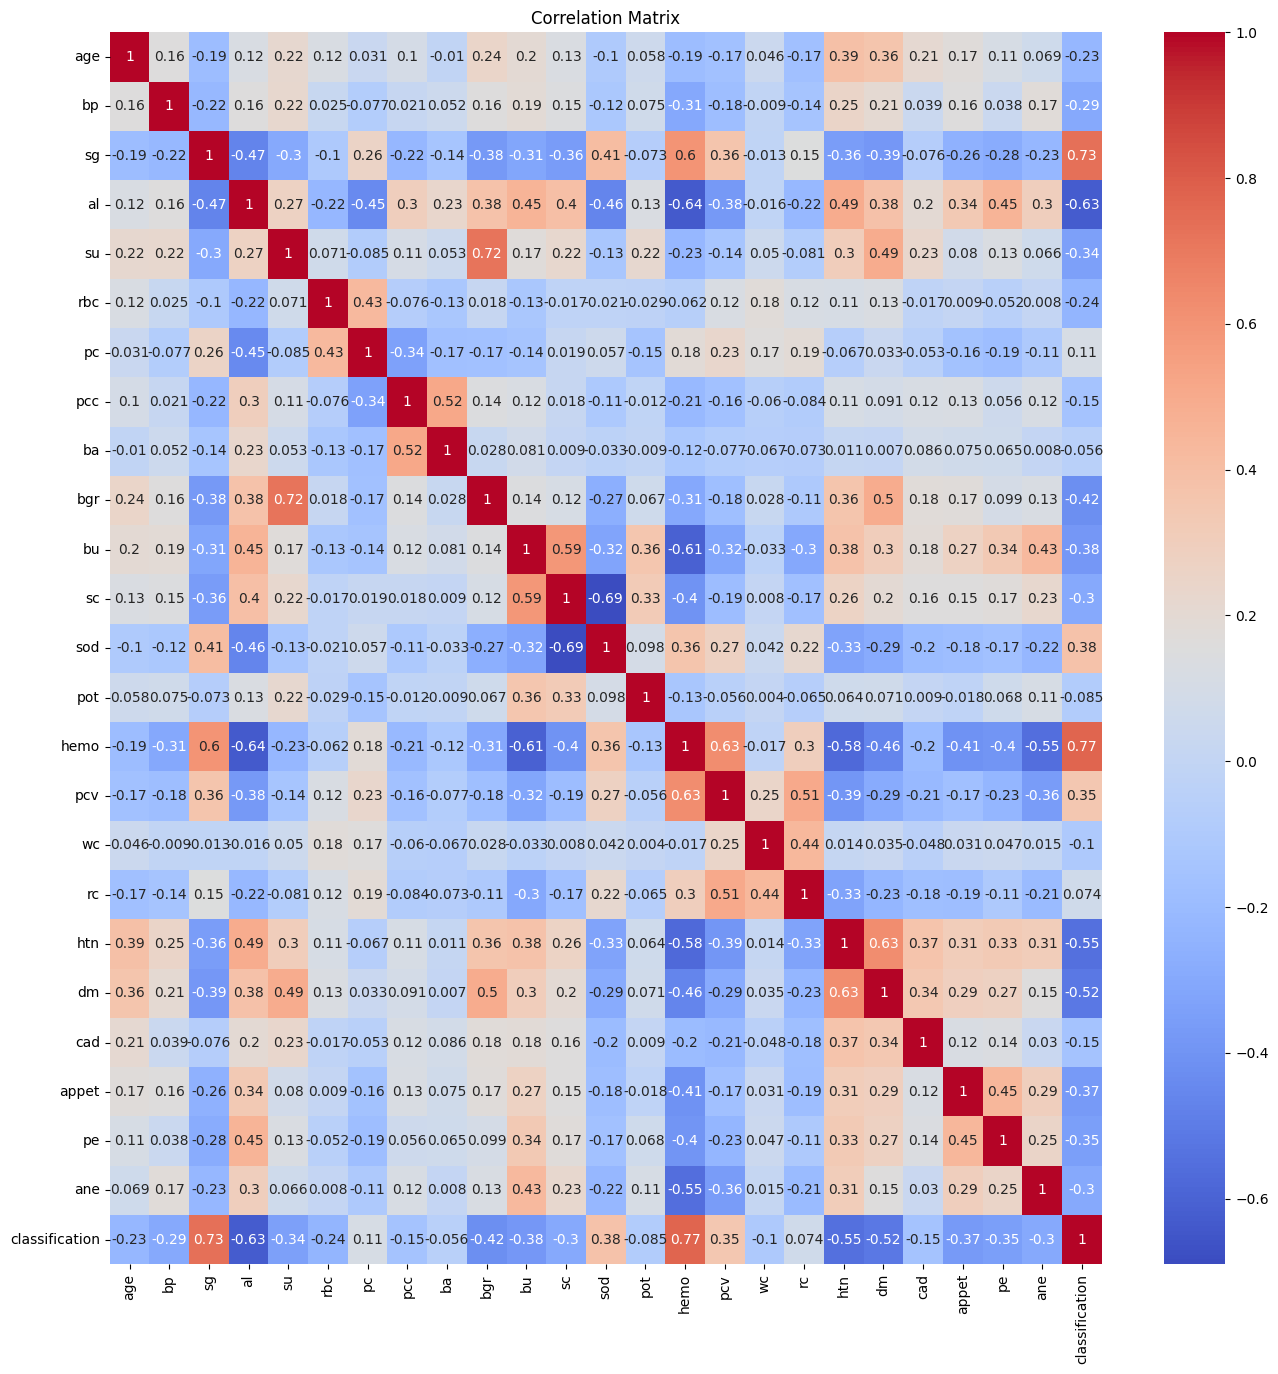

In [ ]:
plt.figure(figsize=(16,16))
# Create a heatmap using seaborn
sns.heatmap(df.corr().round(3), annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)

#replace missing values for BP column with median
df['bp'].fillna(df['bp'].median(), inplace=True)

#replace missing values for SG column with mean
df['sg'].fillna(df['sg'].mean(), inplace=True)

#replace missing values for AL column with mean
df['al'].fillna(df['al'].mean(), inplace=True)

#replace missing values for SU column with mean
df['su'].fillna(df['su'].mean(), inplace=True)

In [ ]:
# Replace missing values for 'bgr' column with mean
df['bgr'].fillna(df['bgr'].mean(), inplace=True)

# Replace missing values for 'bu' column with mean
df['bu'].fillna(df['bu'].mean(), inplace=True)

# Replace missing values for 'sc' column with mean
df['sc'].fillna(df['sc'].mean(), inplace=True)

# Replace missing values for 'sod' column with mean
df['sod'].fillna(df['sod'].mean(), inplace=True)

# Replace missing values for 'pot' column with mean
df['pot'].fillna(df['pot'].mean(), inplace=True)

# Replace missing values for 'hemo' column with mean
df['hemo'].fillna(df['hemo'].mean(), inplace=True)

# Replace missing values for 'pcv' column with mean
df['pcv'].fillna(df['pcv'].mean(), inplace=True)

# Replace missing values for 'wc' column with mean
df['wc'].fillna(df['wc'].mean(), inplace=True)

# Replace missing values for 'rc' column with mean
df['rc'].fillna(df['rc'].mean(), inplace=True)

df.dropna(inplace=True)


In [ ]:
df=df.drop(columns=['al','bgr','htn'])

In [ ]:
df.shape

(400, 22)

In [ ]:
X=df.drop(columns=['classification'])
y=df['classification']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=45)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,rf_pred))

Accuracy: 0.9875


In [ ]:
confusion_matrix(y_test,rf_pred)

array([[48,  0],
       [ 1, 31]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.97      0.98        32

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,rf_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,rf_pred))

Mean squared error: 0.11180339887498948
Mean absolute error: 0.0125


##Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
ada_pred=ada.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,ada_pred))

Accuracy: 0.975


In [ ]:
confusion_matrix(y_test,ada_pred)

array([[47,  1],
       [ 1, 31]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        32

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,ada_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,ada_pred))

Mean squared error: 0.15811388300841897
Mean absolute error: 0.025


##Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gb_pred=gb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,gb_pred)

0.9625

In [ ]:
confusion_matrix(y_test,gb_pred)

array([[47,  1],
       [ 2, 30]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.97      0.94      0.95        32

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,gb_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,gb_pred))

Mean squared error: 0.19364916731037085
Mean absolute error: 0.0375


##Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier




# Create base classifiers
lr_classifier = LogisticRegression(max_iter=10000)
svm_classifier = SVC()  # Set probability=True for soft voting
knn_classifier = KNeighborsClassifier(n_neighbors=15)
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier()

# Create a Bagging Classifier with the base classifiers
bagging_lr = BaggingClassifier(estimator=lr_classifier, n_estimators=10, random_state=42)
bagging_svm = BaggingClassifier(estimator=svm_classifier, n_estimators=10, random_state=42)
bagging_knn = BaggingClassifier(estimator=knn_classifier, n_estimators=10, random_state=42)
bagging_nb = BaggingClassifier(estimator=nb_classifier, n_estimators=10, random_state=42)
bagging_dt = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)

# Fit the Bagging Classifiers on the training data
bagging_lr.fit(X_train, y_train)
bagging_svm.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)
bagging_nb.fit(X_train, y_train)
bagging_dt.fit(X_train, y_train)

# Make predictions using the Bagging Classifiers
y_pred_lr = bagging_lr.predict(X_test)
y_pred_svm = bagging_svm.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)
y_pred_nb = bagging_nb.predict(X_test)
y_pred_dt = bagging_dt.predict(X_test)

# Calculate and print accuracy scores for each Bagging Classifier

print("Bagging Logistic Regression Score:",accuracy_score(y_test, y_pred_lr))
print("Bagging SVM Score:", accuracy_score(y_test, y_pred_svm))
print("Bagging K-Nearest Neighbors Score:", accuracy_score(y_test, y_pred_knn))
print("Bagging Naive Bayes Score:", accuracy_score(y_test, y_pred_nb))
print("Bagging Decision Tree Score:", accuracy_score(y_test, y_pred_dt))

lr=accuracy_score(y_test, y_pred_lr)
svm= accuracy_score(y_test, y_pred_svm)
knn=accuracy_score(y_test, y_pred_knn)
nb=accuracy_score(y_test, y_pred_nb)
dt=accuracy_score(y_test, y_pred_dt)

print("Maximum Accuracy:",max(lr,svm,knn,nb,dt))

Bagging Logistic Regression Score: 0.9625
Bagging SVM Score: 0.8875
Bagging K-Nearest Neighbors Score: 0.875
Bagging Naive Bayes Score: 0.95
Bagging Decision Tree Score: 0.9625
Maximum Accuracy: 0.9625


In [ ]:
confusion_matrix(y_test,y_pred_dt)

array([[47,  1],
       [ 2, 30]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.97      0.94      0.95        32

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,y_pred_dt,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred_dt))

Mean squared error: 0.19364916731037085
Mean absolute error: 0.0375


##Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Define the base classifiers
base_classifiers = [
    ('lr', LogisticRegression(max_iter=10000)),
    ('svm', SVC()),
    ('knn', KNeighborsClassifier(n_neighbors=15)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())

]

# Define the meta-classifier (you can choose any classifier)
#meta_classifier = GaussianNB()

# Create the stacking classifier
stacking_classifier_lr = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(max_iter=10000))
stacking_classifier_svm = StackingClassifier(estimators=base_classifiers, final_estimator=SVC(probability=True))
stacking_classifier_knn = StackingClassifier(estimators=base_classifiers, final_estimator=KNeighborsClassifier(n_neighbors=15))
stacking_classifier_nb = StackingClassifier(estimators=base_classifiers, final_estimator=GaussianNB())
stacking_classifier_dt = StackingClassifier(estimators=base_classifiers, final_estimator=DecisionTreeClassifier())

# Train the stacking classifier on the training data
stacking_classifier_lr.fit(X_train, y_train)
stacking_classifier_svm.fit(X_train, y_train)
stacking_classifier_knn.fit(X_train, y_train)
stacking_classifier_nb.fit(X_train, y_train)
stacking_classifier_dt.fit(X_train, y_train)

# Make predictions on the test data
#stacking_predictions = stacking_classifier.predict(X_test)
y_pred_lr = stacking_classifier_lr.predict(X_test)
y_pred_svm = stacking_classifier_svm.predict(X_test)
y_pred_knn = stacking_classifier_knn.predict(X_test)
y_pred_nb = stacking_classifier_nb.predict(X_test)
y_pred_dt = stacking_classifier_dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print("Stacking Logistic Regression Score:", accuracy_score(y_test, y_pred_lr))
print("Stacking SVM Score:", accuracy_score(y_test, y_pred_svm))
print("Stacking K-Nearest Neighbors Score:", accuracy_score(y_test, y_pred_knn))
print("Stacking Naive Bayes Score:", accuracy_score(y_test, y_pred_nb))
print("Stacking Decision Tree Score:", accuracy_score(y_test, y_pred_dt))
lr=accuracy_score(y_test, y_pred_lr)
svm= accuracy_score(y_test, y_pred_svm)
knn=accuracy_score(y_test, y_pred_knn)
nb=accuracy_score(y_test, y_pred_nb)
dt=accuracy_score(y_test, y_pred_dt)

print("Maximum Accuracy:",max(lr,svm,knn,nb,dt))

Stacking Logistic Regression Score: 0.9875
Stacking SVM Score: 0.975
Stacking K-Nearest Neighbors Score: 0.9625
Stacking Naive Bayes Score: 0.9625
Stacking Decision Tree Score: 0.9625
Maximum Accuracy: 0.9875


In [ ]:
confusion_matrix(y_test,y_pred_knn)

array([[48,  0],
       [ 3, 29]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.91      0.95        32

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,y_pred_knn,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred_knn))

Mean squared error: 0.19364916731037085
Mean absolute error: 0.0375


## Deep Learning

In [ ]:
from sklearn.neural_network import MLPClassifier
dl=MLPClassifier()
dl.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
dl_pred = dl.predict(X_test)
print("Accuracy:",accuracy_score(y_test,dl_pred))

Accuracy: 0.925


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test, dl_pred)

0.925

In [ ]:
confusion_matrix(y_test, dl_pred)

array([[44,  4],
       [ 2, 30]])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test, dl_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test, dl_pred))

Mean squared error: 0.27386127875258304
Mean absolute error: 0.075


## saving Model

In [ ]:
df

,age,bp,sg,su,rbc,pc,pcc,ba,bu,sc,sod,pot,hemo,pcv,wc,rc,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,0.0,2,1,0,0,36.0,1.2,137.528754,4.627244,15.4,32,72,34,1,1,0,0,0,0
1,7.0,50.0,1.020,0.0,2,1,0,0,18.0,0.8,137.528754,4.627244,11.3,26,56,49,0,1,0,0,0,0
2,62.0,80.0,1.010,3.0,1,1,0,0,53.0,1.8,137.528754,4.627244,9.6,19,70,49,1,1,1,0,1,0
3,48.0,70.0,1.005,0.0,1,0,1,0,56.0,3.8,111.000000,2.500000,11.2,20,62,19,0,1,1,1,1,0
4,51.0,80.0,1.010,0.0,1,1,0,0,26.0,1.4,137.528754,4.627244,11.6,23,68,27,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,1,1,0,0,49.0,0.5,150.000000,4.900000,15.7,35,62,30,0,1,0,0,0,1
396,42.0,70.0,1.025,0.0,1,1,0,0,31.0,1.2,141.000000,3.500000,16.5,42,72,44,0,1,0,0,0,1
397,12.0,80.0,1.020,0.0,1,1,0,0,26.0,0.6,137.000000,4.400000,15.8,37,61,36,0,1,0,0,0,1
398,17.0,60.0,1.025,0.0,1,1,0,0,50.0,1.0,135.000000,4.900000,14.2,39,67,41,0,1,0,0,0,1


In [ ]:
import pickle
pickle.dump(rf,open('ckd.pkl','wb'))

In [ ]:
model=pickle.load(open('ckd.pkl','rb'))

In [ ]:
model.predict((np.array([	48.0,70.0,1.005,0.0,1,0,1,0,56.0,3.8,111.000000,2.500000,11.2,20,62,19,3,1,1,1,1]).reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.predict((np.array([17.0,60.0,1.025,0.0,1,1,0,0,50.0,1.0,135.000000,4.900000,14.2,39,67,41,3,1,0,0,0]).reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])